In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])


In [3]:
df

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [5]:
df.columns=["Class label","Alcohol","Malic acid"]
print("✅ Data shape:", df.shape)
df

✅ Data shape: (178, 3)


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [6]:
df["Class label"].value_counts()


Class label
2    71
1    59
3    48
Name: count, dtype: int64

In [7]:
corr_value = df["Alcohol"].corr(df["Malic acid"])
print("✅ Correlation (Alcohol vs Malic acid):", corr_value)


✅ Correlation (Alcohol vs Malic acid): 0.09439694091041397


In [8]:
df[["Alcohol", "Malic acid"]].corr()


,Alcohol,Malic acid
Alcohol,1.000000,0.094397
Malic acid,0.094397,1.000000


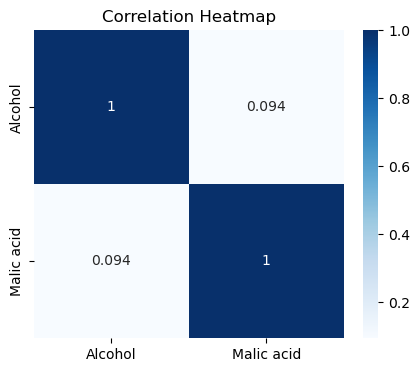

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(df[["Alcohol", "Malic acid"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


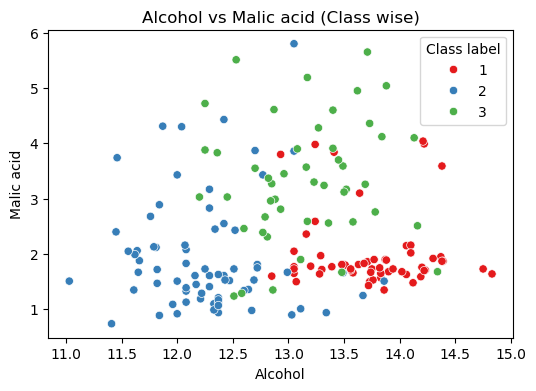

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Alcohol", y="Malic acid", hue="Class label", palette="Set1")
plt.title("Alcohol vs Malic acid (Class wise)")
plt.show()


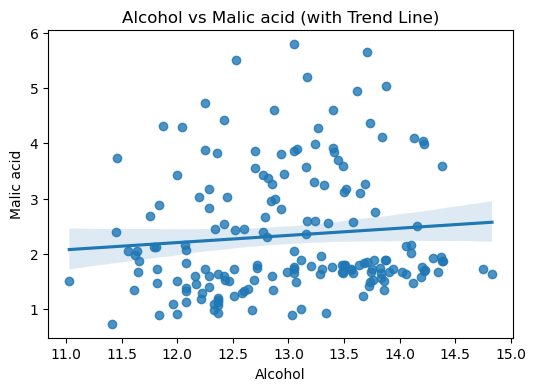

In [11]:
plt.figure(figsize=(6,4))
sns.regplot(data=df, x="Alcohol", y="Malic acid")
plt.title("Alcohol vs Malic acid (with Trend Line)")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# X = features, y = target
X = df.drop("Class label", axis=1)      # Alcohol, Malic acid
y = df["Class label"]                  # 1,2,3

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=0,
    stratify=y
)

# scaler
scaler = MinMaxScaler()

# fit only on train
scaler.fit(X_train)

# transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# convert to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("✅ Before scaling (Train describe):")
print(np.round(X_train.describe(), 2))

print("\n✅ After MinMax scaling (Train describe):")
print(np.round(X_train_scaled.describe(), 2))


✅ Before scaling (Train describe):
       Alcohol  Malic acid
count   124.00      124.00
mean     13.03        2.35
std       0.83        1.17
min      11.41        0.74
25%      12.36        1.62
50%      13.07        1.85
75%      13.70        3.17
max      14.83        5.80

✅ After MinMax scaling (Train describe):
       Alcohol  Malic acid
count   124.00      124.00
mean      0.47        0.32
std       0.24        0.23
min       0.00        0.00
25%       0.28        0.17
50%       0.48        0.22
75%       0.67        0.48
max       1.00        1.00


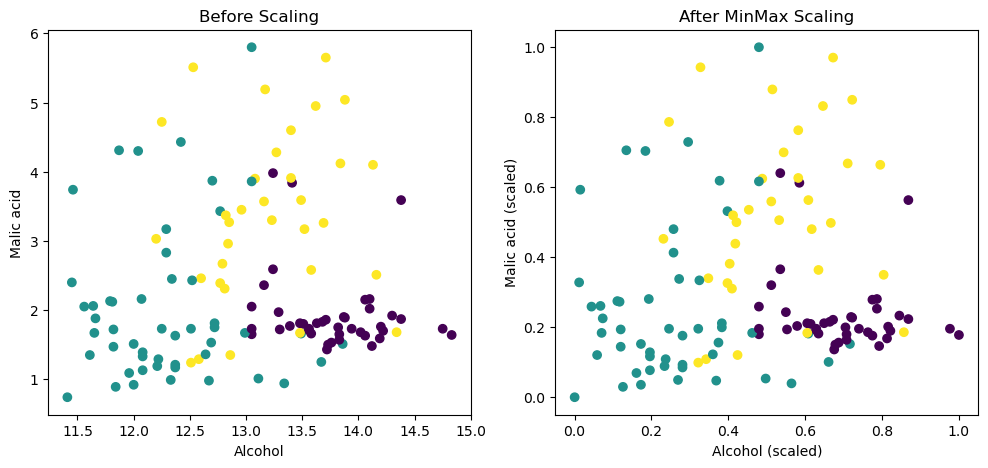

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before scaling
ax1.scatter(X_train["Alcohol"], X_train["Malic acid"], c=y_train)
ax1.set_title("Before Scaling")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic acid")

# After scaling
ax2.scatter(X_train_scaled["Alcohol"], X_train_scaled["Malic acid"], c=y_train)
ax2.set_title("After MinMax Scaling")
ax2.set_xlabel("Alcohol (scaled)")
ax2.set_ylabel("Malic acid (scaled)")

plt.show()


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ✅ KNN WITHOUT scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("✅ KNN Accuracy WITHOUT scaling:", accuracy_score(y_test, y_pred_knn))

# ✅ KNN WITH scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)

print("✅ KNN Accuracy WITH MinMax scaling:", accuracy_score(y_test, y_pred_knn_scaled))


✅ KNN Accuracy WITHOUT scaling: 0.8148148148148148
✅ KNN Accuracy WITH MinMax scaling: 0.7962962962962963


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 26)

acc_without = []
acc_with = []

for k in k_values:
    # WITHOUT scaling
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_without.append(accuracy_score(y_test, y_pred))

    # WITH scaling
    knn_s = KNeighborsClassifier(n_neighbors=k)
    knn_s.fit(X_train_scaled, y_train)
    y_pred_s = knn_s.predict(X_test_scaled)
    acc_with.append(accuracy_score(y_test, y_pred_s))

best_k_without = k_values[np.argmax(acc_without)]
best_k_with = k_values[np.argmax(acc_with)]

print("✅ Best K WITHOUT scaling:", best_k_without, "Accuracy:", max(acc_without))
print("✅ Best K WITH scaling:", best_k_with, "Accuracy:", max(acc_with))


✅ Best K WITHOUT scaling: 20 Accuracy: 0.8518518518518519
✅ Best K WITH scaling: 24 Accuracy: 0.8518518518518519


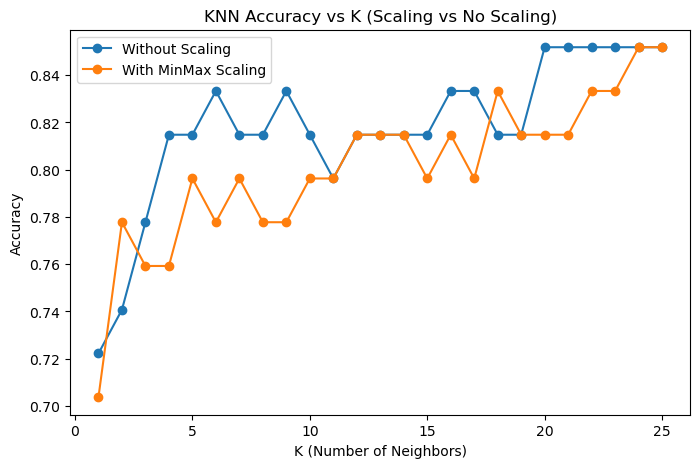

In [16]:
plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), acc_without, marker="o", label="Without Scaling")
plt.plot(list(range(1,26)), acc_with, marker="o", label="With MinMax Scaling")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K (Scaling vs No Scaling)")
plt.legend()
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Standard Scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# KNN with best-ish k (try 20)
knn_std = KNeighborsClassifier(n_neighbors=20)
knn_std.fit(X_train_std, y_train)

y_pred_std = knn_std.predict(X_test_std)

print("✅ KNN Accuracy with StandardScaler (k=20):", accuracy_score(y_test, y_pred_std))


✅ KNN Accuracy with StandardScaler (k=20): 0.8333333333333334


In [18]:
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Normalization (L2)
normalizer = Normalizer(norm="l2")

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# KNN (try k=20)
knn_norm = KNeighborsClassifier(n_neighbors=20)
knn_norm.fit(X_train_norm, y_train)

y_pred_norm = knn_norm.predict(X_test_norm)

print("✅ KNN Accuracy with Normalization (L2) k=20:", accuracy_score(y_test, y_pred_norm))


✅ KNN Accuracy with Normalization (L2) k=20: 0.5925925925925926
